# 2 .a

In [2]:
from sklearn.datasets import fetch_mldata
from sklearn import preprocessing, svm
import matplotlib.pyplot as plt
import numpy as np

mnist = fetch_mldata('MNIST original')
print(mnist)

{'DESCR': 'mldata.org dataset: mnist-original', 'COL_NAMES': ['label', 'data'], 'target': array([0., 0., 0., ..., 9., 9., 9.]), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


In [3]:
data = np.array(mnist.data).astype(float)
scaled_data = preprocessing.scale(data,copy=False)
print(scaled_data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
print(scaled_data.mean())
print(scaled_data.std())

-7.739646306420399e-18
0.9576491198422709


### In the next cell we just take the very first row from the MNIST data set:
    -we calculated the scale for this row
    -in addtion we ploted what it looks like, just for getting familiar with the image
    -mean is really close to Zero , but not exactly Zero

standard deviation :  1.0
mean :  9.063045098980869e-18


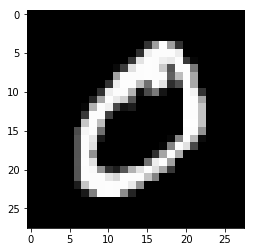

In [25]:
#just for plotting purposes and getting familiar with the image
number = np.array(data[0:1, 0:784]).astype(np.float64)

scaledData = preprocessing.scale(number[0])

print("standard deviation : " ,scaledData.std(axis=0))
print("mean : " ,scaledData.mean(axis=0))

def print_number(arr):
    pixels = arr.reshape((28, 28))
    plt.imshow(pixels, cmap="gray")
    plt.show()
print_number(number)

# 2.c

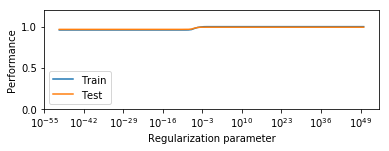

In [9]:
labels = np.array(mnist.target)
tuples = list(zip(labels.astype(int), scaled_data))

d = {}
for key, val in tuples:
    d.setdefault(key, []).append(val)


def train_svm(number_1, number_2, training_data_percentage=0.8):
    p_train = training_data_percentage
    p_test = 1.0 - p_train

    # getting samples for each class for training and testing
    ones_train_samples = int(len(d[number_1]) * p_train)
    sevens_train_samples = int(len(d[number_2]) * p_train)

    ones_test_samples = len(d[number_1]) - ones_train_samples
    sevens_test_samples = len(d[number_2]) - sevens_train_samples
    
    # getting all images of class 1 ,7 for training 
    ones_train = d[number_1][:ones_train_samples]
    sevens_train = d[number_2][:sevens_train_samples]
    # getting all images of class 1,7 for  testing
    ones_test = d[number_1][ones_train_samples + 1 :]
    sevens_test = d[number_2][sevens_test_samples + 1:]

    #training_data = preprocessing.scale(ones_train + sevens_train)
    #test_data = preprocessing.scale(ones_test + sevens_test)
    training_data = ones_train + sevens_train
    test_data = ones_test + sevens_test
    training_target = [number_1] * len(ones_train) + [number_2] * len(sevens_train)
    test_target = [number_1] * len(ones_test) + [number_2] * len(sevens_test)
    C = np.logspace(-50, 50, 100)
    train_error = []
    test_error = []
    for c in C:
        clf = svm.LinearSVC(C=c)
        clf.fit(training_data, training_target)
        train_error.append(clf.score(training_data, training_target))
        test_error.append(clf.score(test_data, test_target))
    
    plt.subplot(2, 1, 1)
    plt.semilogx(C, train_error, label='Train')
    plt.semilogx(C, test_error, label='Test')
    plt.legend(loc='lower left')
    plt.ylim([0, 1.2])
    plt.xlabel('Regularization parameter')
    plt.ylabel('Performance')
    plt.show()
            
train_svm(0, 3,0.3)